# Import the necessary libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

## Read the input file "Bank_Personal_Loan_Modelling.csv"

In [6]:
df1 = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [7]:
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# df1.dtypes lists columns and data types alone. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Input dataset has 5000 rows and 14 Non-Null columns. So, Null values are not present in the dataset.
13 fields are integer type and 1 field(CCAvg) is float type.

In [8]:
# Removes space in the columns 
df1.rename(columns={"ZIP Code": "ZIPCode"},inplace=True)
df1.rename(columns={"Personal Loan": "PersonalLoan"},inplace=True)
df1.rename(columns={"Securities Account": "SecuritiesAccount"},inplace=True)
df1.rename(columns={"CD Account": "CDAccount"},inplace=True)

In [9]:
# To check whether columns have any NaN values
df1.isna().count()

ID                   5000
Age                  5000
Experience           5000
Income               5000
ZIPCode              5000
Family               5000
CCAvg                5000
Education            5000
Mortgage             5000
PersonalLoan         5000
SecuritiesAccount    5000
CDAccount            5000
Online               5000
CreditCard           5000
dtype: int64

###### There is no Nan values present in the input dataset





In [10]:
#To check whether any column has blank values. There are no blanks in data in our dataset
df1.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [11]:
# To validate whether negative values are present in each columns

print("Total no. of negative values in Age               : ", sum(x < 0 for x in df1["Age"]))
print("Total no. of negative values in Experience        : ", sum(x < 0 for x in df1["Experience"]))
print("Total no. of negative values in Income            : ", sum(x < 0 for x in df1["Income"]))
print("Total no. of negative values in ZIP Code          : ", sum(x < 0 for x in df1["ZIPCode"]))
print("Total no. of negative values in Family            : ", sum(x < 0 for x in df1["Family"]))
print("Total no. of negative values in Education         : ", sum(x < 0 for x in df1["Education"]))
print("Total no. of negative values in Mortgage          : ", sum(x < 0 for x in df1["Mortgage"]))
print("Total no. of negative values in PersonalLoan      : ", sum(x < 0 for x in df1["PersonalLoan"]))
print("Total no. of negative values in SecuritiesAccount : ", sum(x < 0 for x in df1["SecuritiesAccount"]))
print("Total no. of negative values in CDAccount         : ", sum(x < 0 for x in df1["CDAccount"]))
print("Total no. of negative values in Online            : ", sum(x < 0 for x in df1["Online"]))
print("Total no. of negative values in CreditCard        : ", sum(x < 0 for x in df1["CreditCard"]))

Total no. of negative values in Age               :  0
Total no. of negative values in Experience        :  52
Total no. of negative values in Income            :  0
Total no. of negative values in ZIP Code          :  0
Total no. of negative values in Family            :  0
Total no. of negative values in Education         :  0
Total no. of negative values in Mortgage          :  0
Total no. of negative values in PersonalLoan      :  0
Total no. of negative values in SecuritiesAccount :  0
Total no. of negative values in CDAccount         :  0
Total no. of negative values in Online            :  0
Total no. of negative values in CreditCard        :  0


###### Experience field has 52 negative values.  So, we need to update these negative values with median value


In [12]:
# replace negative values with median for Experience field
median_val = df1["Experience"].median()
df1["Experience"] = np.where(df1["Experience"] < 0, median_val, df1["Experience"])
print("Total no. of negative values in Experience: ", sum(x < 0 for x in df1["Experience"]))

Total no. of negative values in Experience:  0


In [13]:
# ID column has no effect in the model, so, drop the column
df1.drop(["ID"], axis=1, inplace = True) 

In [14]:
#ID column has been dropped. So, 13 columns are present in the current dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null float64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Mean is greater than median for the varaibles: Age,Experience,Income,ZIPCode,Family,CCAvg, Mortgage

Mean is greater than median for the continous variables:Income, CCAvg and Mortgage
So, these continous variables are right skewed.

Median is zero for columns Mortgage, Personal Loan, Securities Account and CD Account since more than half of the values are 0.0


In [17]:
#To verify the field is right or left skewed ditribution
#Right skewed if it returns the positive value(greater than 0.1) and left skewed if it returns the negative value(less than -0.1).
print('Skewness of age        : ', df1["Age"].skew())
print('Skewness of Experience : ', df1["Experience"].skew())
print('Skewness of Income     : ', df1["Income"].skew())
print('Skewness of ZIPCode     : ', df1["ZIPCode"].skew())
print('Skewness of CCAvg      : ', df1["CCAvg"].skew())
print('Skewness of Mortgage   : ', df1["Mortgage"].skew())

Skewness of age        :  -0.02934068151284029
Skewness of Experience :  -0.01409975101962344
Skewness of Income     :  0.8413386072610816
Skewness of ZIPCode     :  -12.500221098132892
Skewness of CCAvg      :  1.5984433366678663
Skewness of Mortgage   :  2.1040023191079444


# Univariate and Bivariate analysis

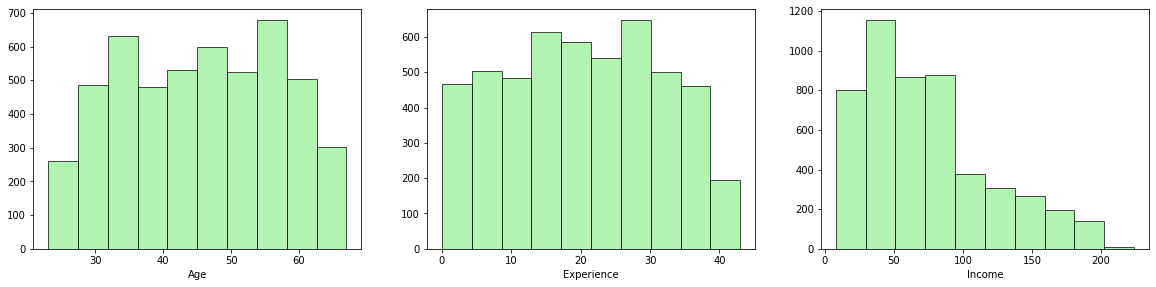

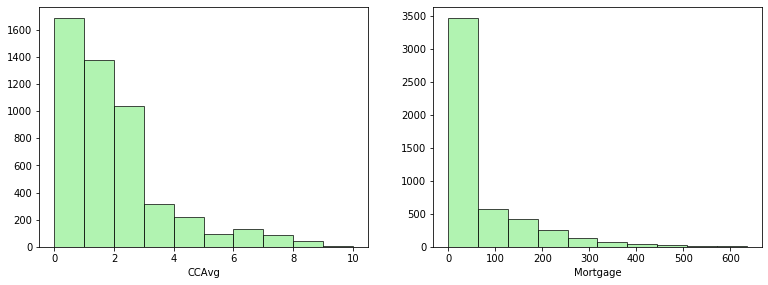

In [15]:
# Hist Plot to find the distribution of the fields: Age, Experience, Income, CCAvg, Mortgage
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df1.Age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Age")

plt.subplot(3,3,2)
plt.hist(df1.Experience, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Experience")

plt.subplot(3,3,3)
plt.hist(df1.Income, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Income")
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(df1.CCAvg, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("CCAvg")


plt.subplot(3,3,2)
plt.hist(df1.Mortgage, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("Mortgage")

plt.show()

* From the output of histogram plot, we can conclude that Income, CCAvg and Mortgage have right skewed distribution.

* Age is normally distributed

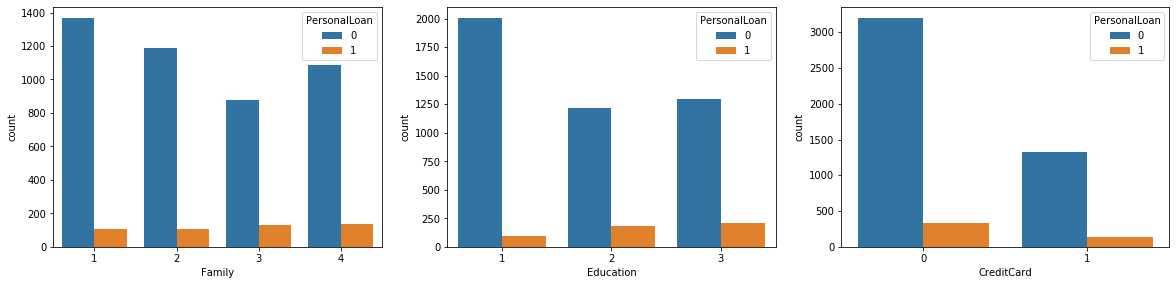

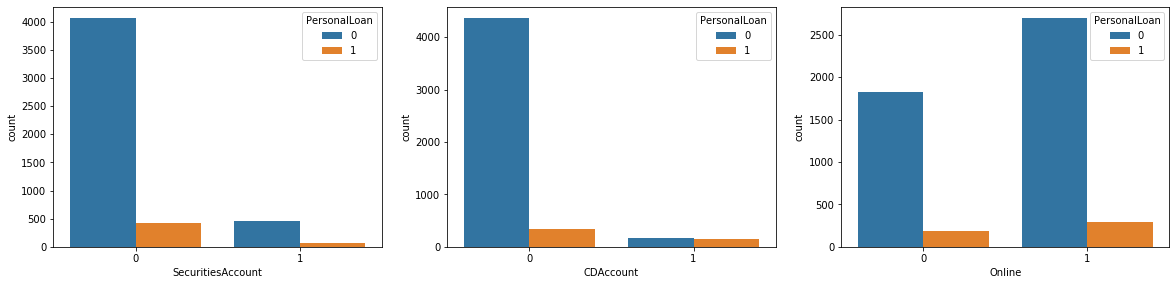

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(df1.Family,hue=df1.PersonalLoan)

plt.subplot(3,3,2)
sns.countplot(df1.Education,hue=df1.PersonalLoan)

plt.subplot(3,3,3)
sns.countplot(df1.CreditCard,hue=df1.PersonalLoan)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(df1.SecuritiesAccount,hue=df1.PersonalLoan)

plt.subplot(3,3,2)
sns.countplot(df1.CDAccount,hue=df1.PersonalLoan)

plt.subplot(3,3,3)
sns.countplot(df1.Online,hue=df1.PersonalLoan)
plt.show()

#### The following points are gathered using the countplot: 

From the above figures, we can identify which category of people getting more Personal loan for each fields. 
Note: out of 5000, 480 people took the Personal loan.

* Personal loan based on Family: Input data contains family sizes(1,2,3 and 4). Family size of 3 and 4 took Personal Loan little bit more than Family size of 1 and 2.
    Family Size 1: 107   
    Family Size 2: 106    
    Family Size 3: 133   
    Family Size 4: 134  



* Personal loan based on Education:  Education level of 2 and 3 took more Personal Loan than Education level of 1. 
    Education 1:  4  
    Education 2: 50  
    Education 3: 52  


* Personal loan based on CreditCard: Sufficient quantity of data available for both cases of CreditCard (0 and 1). People who do not have Credit card took more Personal loan than people who have Credit Card. 
    CreditCard 0: 337
    CreditCard 1: 143


* Personal loan based on Security Account: Less quantity of data avalable for the people with Security Account.                      People without Security Account(i.e. Securities Account = 0) took more personal loan than people with Security Account(i.e. Securities Account = 1).
    Security Account 0 : 96
    Security Account 1 : 10


* Personal loan based on CD Account: Less quantity of data avalable for the people who has CD Account (i.e. CD Account = 1). People who do not have CD Account took little more personal loan than people who have CD Account.
    CD Account 0: 340
    CD Account 1: 140


* Personal loan based on Online: People with online account took more Personal loan.  
    Online 0: 189
    Online 1: 291

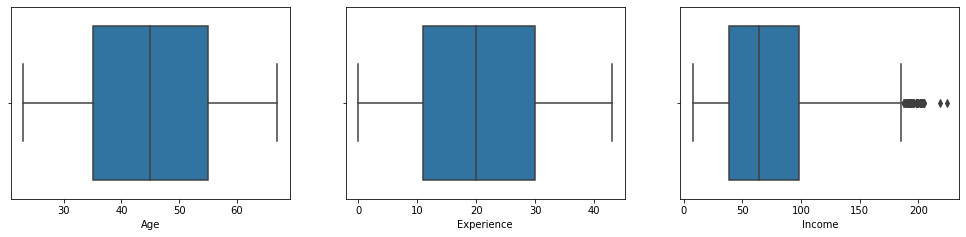

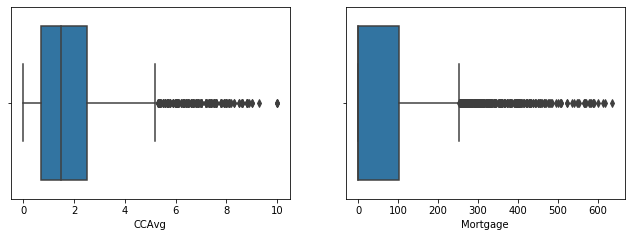

In [19]:
# Box plot to identify the presence of outliers
plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
sns.boxplot(df1["Age"])

plt.subplot(3,3,2)
sns.boxplot(df1["Experience"])

plt.subplot(3,3,3)
sns.boxplot(df1["Income"])
plt.show()

plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
sns.boxplot(df1["CCAvg"])

plt.subplot(3,3,2)
sns.boxplot(df1["Mortgage"])
plt.show()

* No outliers in Age and Experience
* Many outliers are present in Income
* Large number of outliers in CCAvg and Mortgage

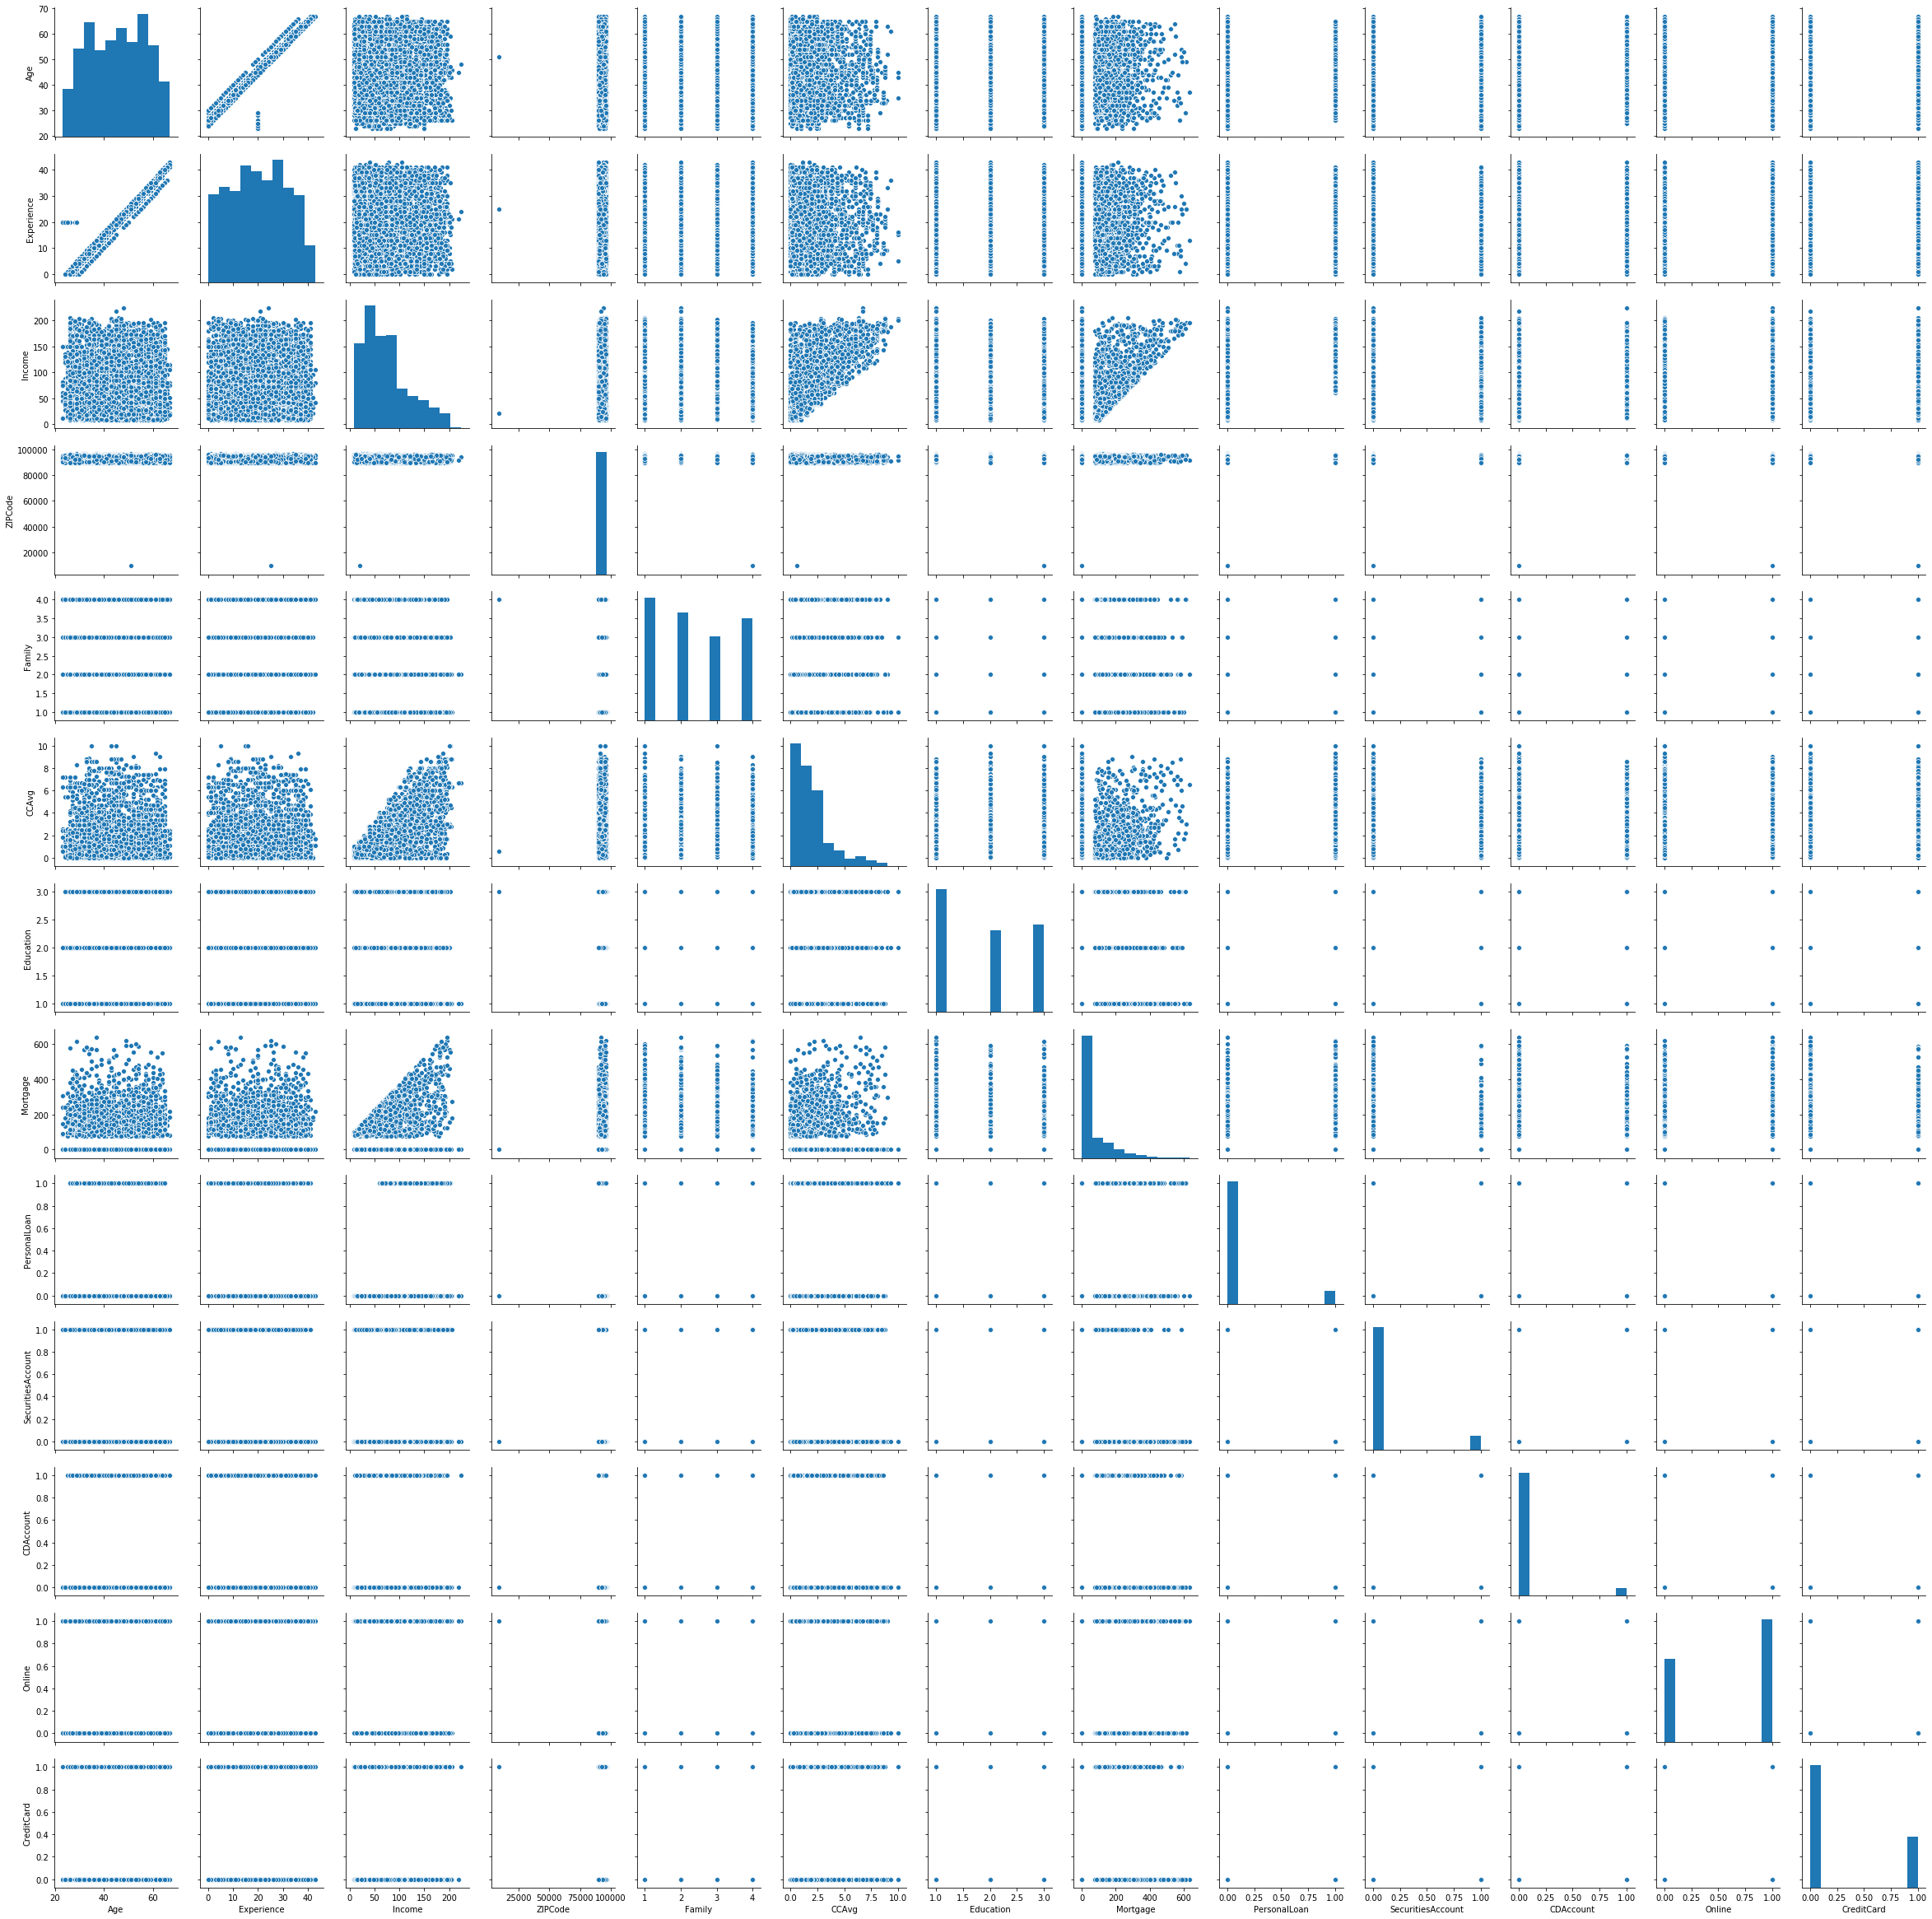

In [20]:
#Pair Plot to identify distribution, relationship with other attributes and so on.  
sns.pairplot(df1)


* Age and Experience are normally distributed. Most of the people do have Service, CD Account, Personal loan. More people do not have CreditCard.   
* Income, CCAvg and Mortgage have right skewed distribution.
* There is a positive Linear relationship between Age and Experience.
* Those who are getting less Income, they are not getting the personal loan.

(13.0, 0.0)

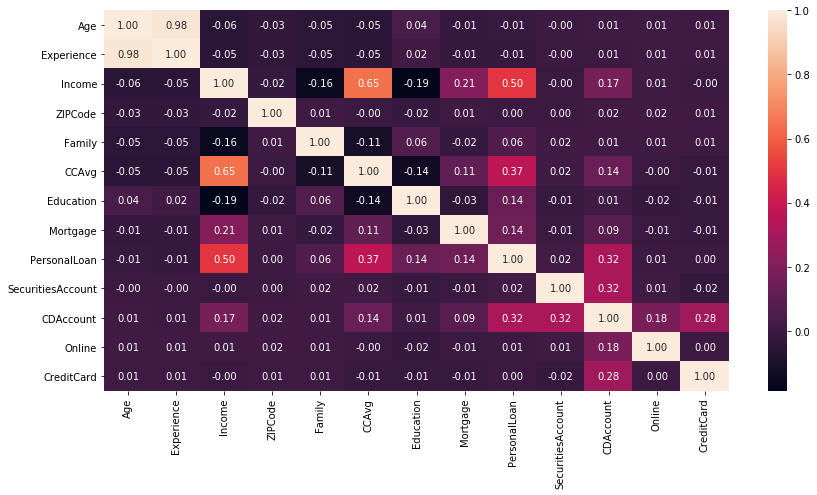

In [13]:
# Generate Heatmap to represent the Correlation between variables
corr1 = df1.corr()
plt.figure(figsize=(14,7))
hm1 = sns.heatmap(corr1,annot=True, fmt = '.2f')
bottom, top = hm1.get_ylim()
hm1.set_ylim(bottom + 0.5, top - 0.5)

**Observations :**
* **Age and Experience** have very strong correlation (98%).  
* **Income and CCAvg** have a moderate correlation (65%). 
* **Income and Personal Loan** have a moderate correlation (50%). 

# Target column Distribution

In [16]:
#df1["PersonalLoan"].value_counts()
df1["PersonalLoan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: PersonalLoan, dtype: float64

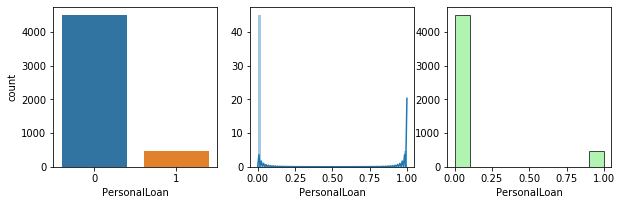

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
sns.countplot(df1.PersonalLoan)

plt.subplot(3,3,2)
sns.distplot(df1.PersonalLoan)

plt.subplot(3,3,3)
plt.hist(df1.PersonalLoan, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel("PersonalLoan")

plt.show()

* Less quantity of data available for the people who took Personal Loan (i.e. Personal Loan = 1). This proves the Class Imbalance Problem.

# Split the input data into Training and Test

In [18]:
x = df1.drop('PersonalLoan',axis=1)
y = df1['PersonalLoan']
xtrain1, xtest1, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [19]:
sc1 = StandardScaler()
xtrain = sc1.fit_transform(xtrain1)
xtest = sc1.transform(xtest1)
print("Training set contains {0:0.1f}% of data" .format((len(xtrain)/len(df1))*100))
print("Test set contains {0:0.1f}% of data" .format((len(xtest)/len(df1))*100))

Training set contains 70.0% of data
Test set contains 30.0% of data


# Model 1: Logistic Regression

In [35]:
# Fit the model on train
LR = LogisticRegression(solver='liblinear')
LR.fit(xtrain,ytrain)
LR_score = LR.score(xtest,ytest)

print("Score of Logistic Regression: {0:0.2f}%" .format(LR_score * 100)) 

Score of Logistic Regression: 94.80%


Logistic Regression used **default parameters, penalty = 'l2' and C = 1.0**

penalty = 'l2' represents the model uses Ridge Regularization technique.

C Parameter is used to avoid Underfit/Overfit model. 

[[  86   63]
 [  15 1336]]


(2.0, 0.0)

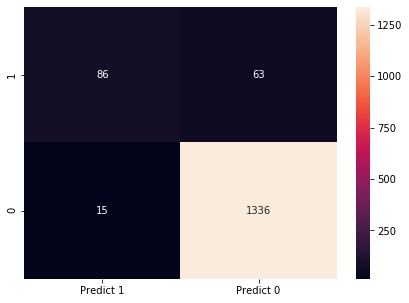

In [40]:
#create a confusion matrix using heatmap
pred1 = LR.predict(xtest)
cm=metrics.confusion_matrix(ytest, pred1, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
hm2 = sns.heatmap(df_cm, annot=True, fmt='g')
bottom, top = hm2.get_ylim()
hm2.set_ylim (bottom +0.5, top - 0.5)

Analysis of Confusion Matrix:
* True Positives (TP): The model correctly predicted that 86 people will take Personal Loan. 
* True Negatives (TN): The model correctly predicted that 1336 people will not take Personal Loan. 
* False Positives (FP): The model incorrectly predicted that 15 people will take Personal Loan, but they did not took Personal Loan. (Type I error)
* False Negatives (FN): The model incorrectly predicted that 63 people will not take Personal Loan, but they took Personal Loan. (Type II error)

In [44]:
print("Classification Report For Logistic Regression")
print("")
CR_log = metrics.classification_report(ytest, pred1, labels = [1,0])
print(CR_log)

Classification Report For Logistic Regression

              precision    recall  f1-score   support

           1       0.85      0.58      0.69       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



**Precision**  is calculated as [ TP/(TP + FP) => 86/(86+15) => 0.85 ] => **Out of total positives predicted, 85% were predicted correctly.**  

**Recall** is calculated as [ TP/(TP + FN) => 86/(86+63) => 0.58 ]   => **Out of actual positives (149), 58% were predicted correctly.**

**Accuracy** is calculated as [ (TP +TN)/(TP + TN + FP + FN) => (86 + 1336)/(86 + 1336 + 15 + 63) => 0.95 ] => **Model has accuracy of 95%.**

In [68]:
# Below code will split the data in 25 folds, and run the model 25 times. 25 Model scores will be stored in cv_logistic 
#  after the execution of cross_val_scores. 
cv_logistic = cross_val_score(LR, x, y, cv=25)
print("Cross Validation Score of Logistic Regression Model: ", round(cv_logistic.mean() * 100,2))

Cross Validation Score of Logistic Regression Model:  90.78


# Model 2: K-Nearest Neighbour

In [45]:
KNN1 = KNeighborsClassifier(n_neighbors=9,weights = 'distance') # K value chosen Randomly
KNN1.fit(xtrain,ytrain)
KNN_score1 = KNN1.score(xtest,ytest)
print("KNN Model score with default parameters:  {0:0.2f}%" .format(KNN_score1 * 100)) 

KNN Model score with default parameters:  94.53%


In [47]:
# To find the best hyperparameters for KNN
KNC = KNeighborsClassifier(weights = 'distance')
neighb1 = (1,3,5,7,9,11,13,15,17)  
hyperparm2 = dict(n_neighbors=neighb1)

# Create grid search using 10-fold cross validation
GS2 = GridSearchCV(KNC, hyperparm2, cv=25, verbose=0)

KNN_best_parm = GS2.fit(xtrain, ytrain)
print('Best n_neighbors:', KNN_best_parm.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 3


In [48]:
# Running the model again with n_neighbors=3
KNN = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
KNN.fit(xtrain,ytrain)
KNN_score2 = KNN.score(xtest,ytest)
print("KNN Model second trial of {0:0.2f}%" .format(KNN_score2 * 100)) 

KNN Model second trial of 94.87%


Model score increased from 94.53 to 94.87% by using the K value generated from GridsearchCV.

(2.0, 0.0)

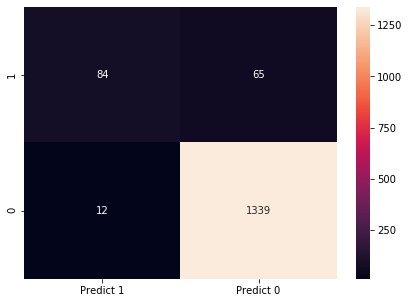

In [49]:
# Confustion Matrix
pred2 = KNN.predict(xtest)

cm_knn=metrics.confusion_matrix(ytest, pred2, labels=[1, 0])

df_cm = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
hm2 = sns.heatmap(df_cm, annot=True, fmt='g')
bottom, top = hm2.get_ylim()
hm2.set_ylim (bottom +0.5, top - 0.5)

Result of Confusion Matrix: 
* True Positives (TP): The model correctly predicted that 84 people will take Personal Loan. 
* True Negatives (TN): The model correctly predicted that 1339 people will not take Personal Loan. 
* False Positives (FP): The model incorrectly predicted that 12 people will take Personal Loan, but they did not took Personal Loan. (Type I error)
* False Negatives (FN): The model incorrectly predicted that 65 people will not take Personal Loan, but they took Personal Loan. (Type II error)

In [53]:
CV_KNN = cross_val_score(KNN, x, y, cv=25)
print("Cross Validation Score of KNN model : ", round(CV_KNN.mean() * 100, 2))

Cross Validation Score of KNN model :  89.0


KNN model has been able to predict 89% with different combinations of train and test dataset.

In [58]:
print("Classification Report For KNN:")
print("*****************************")
CR_KNN = metrics.classification_report(ytest, pred2, labels = [1,0])
print(CR_KNN)

Classification Report For KNN:
*****************************
              precision    recall  f1-score   support

           1       0.88      0.56      0.69       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



**Precision** is calculated as [ TP/(TP + FP) => 84/(84+12) => 0.88 ] => **Out of total positives predicted, 88% were predicted correctly.**  

**Recall** is calculated as [ TP/(TP + FN) => 84/(84+65) => 0.56 ]   => **Out of actual positives (149), 56% were predicted correctly.**

**Accuracy** is calculated as [ (TP +TN)/(TP + TN + FP + FN) => (84 + 1339)/(84 + 1339 + 12 + 65) => 0.95 ] => **Model has accuracy of 95%.**

# Model 3:  Naive Bayes

In [54]:
NB1 = GaussianNB()
NB1.fit(xtrain, ytrain)
NB1_score = NB1.score(xtest,ytest)

print("Naive Bayes Model score : {0:0.2f}%" .format(NB1_score * 100)) 

Naive Bayes Model score : 87.60%


(2.0, 0.0)

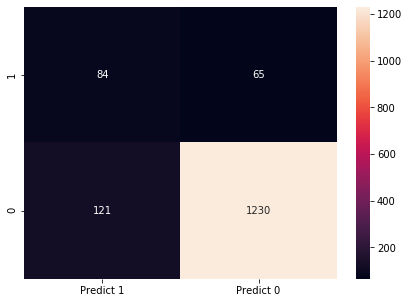

In [55]:
#Confusion matrix for Naive bayes model
pred3 = NB1.predict(xtest)

cm2=metrics.confusion_matrix(ytest, pred3, labels=[1, 0])

df_cm = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
hm3 = sns.heatmap(df_cm, annot=True, fmt='g')
bottom, top = hm3.get_ylim()
hm3.set_ylim (bottom +0.5, top - 0.5)

**Analysis of Confusion Matrix:**
* True Positives (TP): The model correctly predicted that 84 people will take Personal Loan. 
* True Negatives (TN): The model correctly predicted that 1230 people will not take Personal Loan. 
* False Positives (FP): The model incorrectly predicted that 121 people will take Personal Loan, but they did not took Personal Loan. ("Type I error")
* False Negatives (FN): The model incorrectly predicted that 65 people will not take Personal Loan, but they took Personal Loan. ("Type II error")

In [56]:
cv_NB1 = cross_val_score(NB1, x, y, cv=25)
print("Cross Validation Score of Naive Bayes model : ", cv_NB1.mean())

Cross Validation Score of Naive Bayes model :  0.8872058251456286


Naive Bayes model has been able to predict 88% with different combinations of train and test dataset.

In [57]:
print("Classification Report For Naive Bayes:")
print("**************************************")
CR_NB = metrics.classification_report(ytest, pred3, labels = [1,0])
print(CR_NB)

Classification Report For Naive Bayes:
**************************************
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



**Precision** is calculated as  [ TP/(TP + FP) => 84/(84+121) => 0.41 ] => **Out of total positives predicted, 41% were predicted correctly.**  

**Recall** is calculated as [ TP/(TP + FN) => 84/(84+65) => 0.56 ]   => **Out of actual positives (149), 56% were predicted correctly.**

**Accuracy** is calculated as [ (TP +TN)/(TP + TN + FP + FN) => (84 + 1230)/(84 + 1230 + 121 + 65) => 0.88 ] => **Model has accuracy of 88%.**

# Conclusion on Model Outcomes:

##### ROC Curve to Compare Logistic Regression, KNN and Naive Bayes models

In [60]:
# fpr, tpr and thresholds are caluclated for the three models
lr_probs = LR.predict_proba(xtest)
fpr1, tpr1, thres1 = roc_curve(ytest,lr_probs[:,1])
roc_auc1 = auc(fpr1,tpr1)
print("Logistic Regression - Area under the ROC curve : ", roc_auc1)

knn_probs = KNN.predict_proba(xtest)
fpr2, tpr2, thres2 = roc_curve(ytest,knn_probs[:,1])
roc_auc2 = auc(fpr2,tpr2)
print("KNN - Area under the ROC curve                 : ", roc_auc2)

nb_probs = NB1.predict_proba(xtest)
fpr3, tpr3, thres3 = roc_curve(ytest,nb_probs[:,1])
roc_auc3 = auc(fpr3,tpr3)
print("Naive Bayes - Area under the ROC curve         : ", roc_auc3)

Logistic Regression - Area under the ROC curve :  0.9529654891479838
KNN - Area under the ROC curve                 :  0.8675254223816312
Naive Bayes - Area under the ROC curve         :  0.9147785135544637


<Figure size 432x288 with 0 Axes>

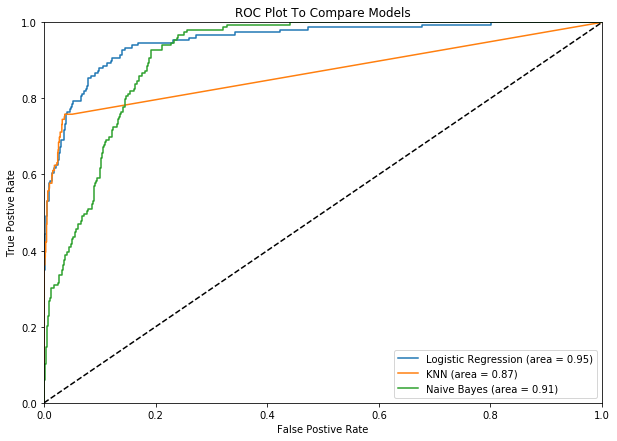

In [61]:
# Plot the ROC Plot
plt.clf()
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2,tpr2, label='KNN (area = %0.2f)' % roc_auc2)
plt.plot(fpr3,tpr3, label='Naive Bayes (area = %0.2f)' % roc_auc3)

#plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Plot To Compare Models")
plt.legend(loc="lower right")
plt.show()

## Area under the ROC curve for Logistic Regression is 0.95 , KNN is 0.87 and Naive Bayes is 0.91
## we can conclude that Logistic Regression outperforms both KNN and Naive Bayes models in predicting the likelihood of customer buying Personal Loan.

# Confidence Interval of Logistic Regression, KNN and Naive Bayes models

In [67]:
# z value of 95% is 1.96

# CI of Logistic regresstion is calculated using accuracy (95%) 
CI1 = 1.96 * math.sqrt((0.95 * (1 - 0.95))/100)
print("Accuracy Range estimate at 95% confidence:")
print("******************************************")
print('Accuracy Range for Logistic Regression would be in between {:,.02f} and {:,.02f}.' 
      .format(.95 - CI1, .95 + CI1))

# CI of KNN is calculated using accuracy (95%) 
CI2 = 1.96 * math.sqrt((0.95 * (1 - 0.95))/100)
print('Accuracy Range for KNN would be in between {:,.02f} and {:,.02f}.' 
      .format(.95 - CI2, .95 + CI2))

# CI of Naive Bayes is calculated using accuracy (88%) 
CI3 = 1.96 * math.sqrt((0.88 * (1 - 0.88))/100)
print('Accuracy Range for Naive Bayes would be in between {:,.02f} and {:,.02f}.' 
      .format(.88 - CI3, .88 + CI3))


Accuracy Range estimate at 95% confidence:
******************************************
Accuracy Range for Logistic Regression would be in between 0.91 and 0.99.
Accuracy Range for KNN would be in between 0.91 and 0.99.
Accuracy Range for Naive Bayes would be in between 0.82 and 0.94.


###### From this result, we can say that the accuracy Range is very good for Logistic Regression and KNN.

# Conclusion:

1) Logistic Regression have a **Accuracy of 95%**, Recall of 58%, **Cross Validation Score of 95%**, Area under the **ROC curve of 95%** and Accuracy range at 95% confidence is in between 91% and 99%.

2) K-Nearest Neighbor have a **Accuracy of 95%**, Recall of 56%, **Cross Validation Score of 89%**, Area under the **ROC curve of 86%** and Accuracy range at 95% confidence is in between 91% and 99%.

3) Naive Bayes have a **Accuracy of 88%**, Recall of 56%, **Cross Validation Score of 88%**, Area under the **ROC curve of 91%** and Accuracy range at 95% confidence is in between 82% and 94%.



Logistic Regression and K-Nearest Neighbor have better Accuracy than Naive Bayes, hence Naive Bayes model is not considered for this problem statement. 

Logistic Regression vs K-Nearest Neighbor: 
Both the model perform equally good, however Cross validation score for Logistic Regression is greater than KNN which means  Logistic Regression shows very good consistency with multiple training and test folds of dataset. 
This shows Logistic Regression will perform better with new data. 

**So, we can conclude that the logistic regression outperforms KNN and Naive Bayes models in predicting the likelihood of a customer buying personal loans.** 